In [58]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from feature_selector import FeatureSelector
pd.set_option('display.max_columns', 100)
sns.set_theme(rc={'figure.figsize':(16,9)})
pd.set_option('display.max_rows', 179)
import optuna
from optuna import create_study, logging
from optuna.pruners import MedianPruner
from optuna.integration import XGBoostPruningCallback
setattr(pd, "Int64Index", pd.Index)
setattr(pd, "Float64Index", pd.Index)

In [59]:
data = pd.read_csv('Desktop/Данные для разработки (1).csv', on_bad_lines='skip', sep = ';')

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\3424554218.py:1: DtypeWarning: Columns (84,169) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Desktop/Данные для разработки (1).csv', on_bad_lines='skip', sep = ';')


# Обработка данных (даты)

In [60]:
data.drop(['PersonId', 'flagFC', 'flagSP', 'flagEF'], inplace = True, axis = 1)

In [61]:
data[['date', 'time']] = data['CreateTime'].str.split(' ', expand=True)

In [62]:
data.drop('time', inplace = True, axis = 1)

In [63]:
data.head()

,DraftId,CreateTime,Amount,age,Duration,Gender,prev_drafts_cnt,prev_loans_cnt,all_act_3_1_d,all_act_cred,all_act_cred_1,all_act_cred_2,all_act_cred_3,all_act_cred_3_1,all_act_cred_s,all_cred_rep_1,all_cred_rep_11,all_cred_rep_13,all_cred_rep_3,all_rep_cred_1,avg_12_month,avg_over_1_90,Count_0,Count_0_len_num,Count_01_len_num,Count_1,Count_12_len_num,Count_2,Count_3,Count_4,Count_456_len_num,Count_5,Count_5B_len_num,Count_6,Count_7,Count_8,Count_9,Count_B,Count_C,Count_C_len_num,Count_I,Count_R,Count_S,Count_Sp,Count_Sp_len_num,Count_T,Count_U,Count_W,cred_activ_1,cred_activ_2,...,ti_month_all,ti_quarter,ti_week,ti_week_all,ti_year,Cred_Deb_2,Dola_RD_1,N_90_365,a_sum_Credit_700,cred_hist_1,d_cnt_12030,d_cnt_R,last_payment,miAmount_45,miAmount_90,perc_amount,s_Amount,s_Amount_30,s_Amount_60,s_Credit_befo_RD,s_cnt_cred_90,F_NumR_30_90,F_iTA_30_365,F_mfoCFor_30_180,F_IssAmnt,F_long_Card,SA,mfoCountFor30Days,outgoingTransferAmountFor365Days,outgoingTransferAmountFor90Days,N_record_IP,cred_365_count,gibdd_180_count,gibdd_180_sum,gibdd_730_count,imush_180_count,max_Summa,max_hist_IPDate,max_hist_IPEndDate,max_hist_RIDDate,min_hist_IPDate,min_hist_IPEndDate,min_hist_RIDDate,st46_3_365_count,st46_4_365_count,st47_7_730_count,sum_RIDDate_365,sum_RIDDate_730,is_paid,date
0,44704116-DC05-48A5-863D-E2FA13495E85,13.08.2023 10:38,8900,46,31,2,5.0,1.0,"-0,020474",19,19,"0,21839",19,"0,197916",-365444,239505,"0,305181","0,283621",239505,"-0,02156","59044,74","369,7479167",210.0,"0,1852","0,2328",54.0,"0,0838",41.0,54.0,18.0,"0,0741",32.0,"0,1279",34.0,24.0,22.0,33.0,0.0,66.0,"0,0582",0.0,0.0,0.0,515.0,"0,4541",0.0,0.0,0.0,19,19,...,18.0,31.0,1.0,2.0,122.0,"1,0067",1,1,8960,73.0,1.0,0,61.0,NaN,"0,8989","0,12",8000.0,0.0,0.0,8960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.08.2023
1,BD18C2D6-04D5-44FD-AA0F-A61FFC06407C,20.07.2023 9:32,3000,28,29,1,4.0,3.0,0,4,4,"0,333333",4,"0,333333",-8672,15127,"0,388609","0,388609",15127,0,"1478,67",0,25.0,"0,1667","0,2",5.0,"0,0933",9.0,6.0,2.0,"0,0733",4.0,"0,16",5.0,6.0,4.0,5.0,0.0,8.0,"0,0533",0.0,0.0,0.0,67.0,"0,4467",0.0,0.0,0.0,4,4,...,14.0,12.0,2.0,2.0,11.0,"5,4473",1,1,"5447,333333",56.0,1.0,1,0.0,1,1,"0,175683",13900.0,7000.0,13900.0,16342,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20.07.2023
2,C300B4A1-8083-411C-B6F5-6D88E543ACD7,03.02.2023 6:27,10000,21,31,2,6.0,1.0,"0,005575",21,17,"0,155963",21,"0,161538","-1674693,67","412698,1","0,183074","0,186292","497250,1","0,003218","199646,26","156,0283688",229.0,"0,1868","0,2178",38.0,"0,0514",25.0,38.0,19.0,"0,0546",29.0,"0,0669",19.0,16.0,4.0,14.0,0.0,90.0,"0,0734",0.0,0.0,0.0,685.0,"0,5587",0.0,0.0,0.0,17,20,...,26.0,57.0,3.0,3.0,143.0,"1,33",0,1,13300,48.0,1.0,1,15.0,NaN,1,"0,33",10000.0,0.0,10000.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03.02.2023
3,EE2E2559-43DD-4919-ADCC-2B85F803E22C,23.11.2023 20:49,15900,35,31,2,3.0,3.0,"0,001152",50,45,"0,321428",50,"0,32258","638376,99",780887,"0,387726","0,566882",2705379,"0,179156","189695,24",0,458.0,"0,2271","0,2796",106.0,"0,1155",127.0,113.0,36.0,"0,063",47.0,"0,121",44.0,40.0,27.0,86.0,0.0,93.0,"0,0461",0.0,5.0,0.0,780.0,"0,3867",0.0,0.0,0.0,45,46,...,33.0,28.0,6.0,7.0,190.0,"9,4592",0,0,50134,207.0,0.0,0,0.0,NaN,NaN,"3,436637",33900.0,0.0,0.0,90602,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,23.11.2023
4,C8286AD9-9721-48F7-97C9-0AD41653272B,15.05.2023 8:01,9900,47,30,2,6.0,1.0,"0,03027",23,18,"0,260869",23,"0,291139",33875,251718,"0,277907","0,511911",727918,"0,234004","81237,37",0,156.0,"0,1518","0,1712",20.0,"0,0652",47.0,74.0,40.0,"0,1245",48.0,"0,1459",40.0,20.0,22.0,20.0,0.0,50.0,"0,0486",0.0,0.0,8.0,452.0,"0,4397",0.0,0.0,11.0,18,20,...,2.0,30.0,1.0,1.0,120.0,0,NaN,0,0,268.0,0.0,0,109.0,NaN,NaN,-1,6900.0,0.0,0

In [64]:
#data[['st1', 'st2', 'st3']] = data['date'].str.split('.', expand=True)

In [65]:
#data[['st1', 'st2', 'st3']]

In [66]:
data['date'] = data['date'].astype('str')

In [67]:
data['tochka'] = 0
data['shtrih'] = 0

for i in range(len(data)):
    if ('-' in data.loc[i, 'date']):
        data.loc[i, 'shtrih'] = 1
    if ('.' in data.loc[i, 'date']):
        data.loc[i, 'tochka'] = 1    

In [68]:
d1 = data[data['tochka'] == 1]
d2 = data[data['shtrih'] == 1]


In [69]:
d2[['st1','st2', 'st3']] = d2['date'].str.split('-', expand=True)
d1[['st1','st2', 'st3']] = d1['date'].str.split('.', expand=True)


C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\3082400640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['st1','st2', 'st3']] = d2['date'].str.split('-', expand=True)
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\3082400640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['st1','st2', 'st3']] = d2['date'].str.split('-', expand=True)
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\3082400640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [70]:
d_promez = d1['st3']
d1['st3'] = d1['st1']
d1['st1'] = d_promez

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2830590014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['st3'] = d1['st1']
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2830590014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['st1'] = d_promez


In [71]:
d1.drop(['tochka', 'shtrih'], axis = 1, inplace = True)
d1.head()

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\4197834136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.drop(['tochka', 'shtrih'], axis = 1, inplace = True)


,DraftId,CreateTime,Amount,age,Duration,Gender,prev_drafts_cnt,prev_loans_cnt,all_act_3_1_d,all_act_cred,all_act_cred_1,all_act_cred_2,all_act_cred_3,all_act_cred_3_1,all_act_cred_s,all_cred_rep_1,all_cred_rep_11,all_cred_rep_13,all_cred_rep_3,all_rep_cred_1,avg_12_month,avg_over_1_90,Count_0,Count_0_len_num,Count_01_len_num,Count_1,Count_12_len_num,Count_2,Count_3,Count_4,Count_456_len_num,Count_5,Count_5B_len_num,Count_6,Count_7,Count_8,Count_9,Count_B,Count_C,Count_C_len_num,Count_I,Count_R,Count_S,Count_Sp,Count_Sp_len_num,Count_T,Count_U,Count_W,cred_activ_1,cred_activ_2,...,ti_week_all,ti_year,Cred_Deb_2,Dola_RD_1,N_90_365,a_sum_Credit_700,cred_hist_1,d_cnt_12030,d_cnt_R,last_payment,miAmount_45,miAmount_90,perc_amount,s_Amount,s_Amount_30,s_Amount_60,s_Credit_befo_RD,s_cnt_cred_90,F_NumR_30_90,F_iTA_30_365,F_mfoCFor_30_180,F_IssAmnt,F_long_Card,SA,mfoCountFor30Days,outgoingTransferAmountFor365Days,outgoingTransferAmountFor90Days,N_record_IP,cred_365_count,gibdd_180_count,gibdd_180_sum,gibdd_730_count,imush_180_count,max_Summa,max_hist_IPDate,max_hist_IPEndDate,max_hist_RIDDate,min_hist_IPDate,min_hist_IPEndDate,min_hist_RIDDate,st46_3_365_count,st46_4_365_count,st47_7_730_count,sum_RIDDate_365,sum_RIDDate_730,is_paid,date,st1,st2,st3
0,44704116-DC05-48A5-863D-E2FA13495E85,13.08.2023 10:38,8900,46,31,2,5.0,1.0,"-0,020474",19,19,"0,21839",19,"0,197916",-365444,239505,"0,305181","0,283621",239505,"-0,02156","59044,74","369,7479167",210.0,"0,1852","0,2328",54.0,"0,0838",41.0,54.0,18.0,"0,0741",32.0,"0,1279",34.0,24.0,22.0,33.0,0.0,66.0,"0,0582",0.0,0.0,0.0,515.0,"0,4541",0.0,0.0,0.0,19,19,...,2.0,122.0,"1,0067",1,1,8960,73.0,1.0,0,61.0,NaN,"0,8989","0,12",8000.0,0.0,0.0,8960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.08.2023,2023,08,13
1,BD18C2D6-04D5-44FD-AA0F-A61FFC06407C,20.07.2023 9:32,3000,28,29,1,4.0,3.0,0,4,4,"0,333333",4,"0,333333",-8672,15127,"0,388609","0,388609",15127,0,"1478,67",0,25.0,"0,1667","0,2",5.0,"0,0933",9.0,6.0,2.0,"0,0733",4.0,"0,16",5.0,6.0,4.0,5.0,0.0,8.0,"0,0533",0.0,0.0,0.0,67.0,"0,4467",0.0,0.0,0.0,4,4,...,2.0,11.0,"5,4473",1,1,"5447,333333",56.0,1.0,1,0.0,1,1,"0,175683",13900.0,7000.0,13900.0,16342,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20.07.2023,2023,07,20
2,C300B4A1-8083-411C-B6F5-6D88E543ACD7,03.02.2023 6:27,10000,21,31,2,6.0,1.0,"0,005575",21,17,"0,155963",21,"0,161538","-1674693,67","412698,1","0,183074","0,186292","497250,1","0,003218","199646,26","156,0283688",229.0,"0,1868","0,2178",38.0,"0,0514",25.0,38.0,19.0,"0,0546",29.0,"0,0669",19.0,16.0,4.0,14.0,0.0,90.0,"0,0734",0.0,0.0,0.0,685.0,"0,5587",0.0,0.0,0.0,17,20,...,3.0,143.0,"1,33",0,1,13300,48.0,1.0,1,15.0,NaN,1,"0,33",10000.0,0.0,10000.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03.02.2023,2023,02,03
3,EE2E2559-43DD-4919-ADCC-2B85F803E22C,23.11.2023 20:49,15900,35,31,2,3.0,3.0,"0,001152",50,45,"0,321428",50,"0,32258","638376,99",780887,"0,387726","0,566882",2705379,"0,179156","189695,24",0,458.0,"0,2271","0,2796",106.0,"0,1155",127.0,113.0,36.0,"0,063",47.0,"0,121",44.0,40.0,27.0,86.0,0.0,93.0,"0,0461",0.0,5.0,0.0,780.0,"0,3867",0.0,0.0,0.0,45,46,...,7.0,190.0,"9,4592",0,0,50134,207.0,0.0,0,0.0,NaN,NaN,"3,436637",33900.0,0.0,0.0,90602,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,23.11.2023,2023,11,23
4,C8286AD9-9721-48F7-97C9-0AD41653272B,15.05.2023 8:01,9900,47,30,2,6.0,1.0,"0,03027",23,18,"0,260869",23,"0,291139",33875,251718,"0,277907","0,511911",727918,"0,234004","81237,37",0,156.0,"0,1518","0,1712",20.0,"0,0652",47.0,74.0,40.0,"0,1245",48.0,"0,1459",40.0,20.0,22.0,20.0,0.0,50.0,"0,0486",0.0,0.0,8.0,452.0,"0,4397",0.0,0.0,11.0,18,20,...,1.0,120.0,0,NaN,0,0,268.0,0.0,0,109.0,NaN,NaN,-1,6900.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [72]:
d2.drop(['tochka', 'shtrih'], axis = 1, inplace = True)

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\951743598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.drop(['tochka', 'shtrih'], axis = 1, inplace = True)


In [73]:
data = pd.concat([d1, d2])

In [74]:
data.drop('CreateTime', axis = 1, inplace = True)

In [75]:
data.st1 = data.st1.astype('str')
data.st2 = data.st2.astype('str')
data.st3 = data.st3.astype('str')

In [76]:
data['Tdate'] = data.st1 + '-' + data.st2 + '-' + data.st3

In [77]:
data['Tdate'] = pd.to_datetime(data['Tdate'], format = "%Y-%m-%d")

In [78]:
data.head()

,DraftId,Amount,age,Duration,Gender,prev_drafts_cnt,prev_loans_cnt,all_act_3_1_d,all_act_cred,all_act_cred_1,all_act_cred_2,all_act_cred_3,all_act_cred_3_1,all_act_cred_s,all_cred_rep_1,all_cred_rep_11,all_cred_rep_13,all_cred_rep_3,all_rep_cred_1,avg_12_month,avg_over_1_90,Count_0,Count_0_len_num,Count_01_len_num,Count_1,Count_12_len_num,Count_2,Count_3,Count_4,Count_456_len_num,Count_5,Count_5B_len_num,Count_6,Count_7,Count_8,Count_9,Count_B,Count_C,Count_C_len_num,Count_I,Count_R,Count_S,Count_Sp,Count_Sp_len_num,Count_T,Count_U,Count_W,cred_activ_1,cred_activ_2,cred_activ_3,...,ti_year,Cred_Deb_2,Dola_RD_1,N_90_365,a_sum_Credit_700,cred_hist_1,d_cnt_12030,d_cnt_R,last_payment,miAmount_45,miAmount_90,perc_amount,s_Amount,s_Amount_30,s_Amount_60,s_Credit_befo_RD,s_cnt_cred_90,F_NumR_30_90,F_iTA_30_365,F_mfoCFor_30_180,F_IssAmnt,F_long_Card,SA,mfoCountFor30Days,outgoingTransferAmountFor365Days,outgoingTransferAmountFor90Days,N_record_IP,cred_365_count,gibdd_180_count,gibdd_180_sum,gibdd_730_count,imush_180_count,max_Summa,max_hist_IPDate,max_hist_IPEndDate,max_hist_RIDDate,min_hist_IPDate,min_hist_IPEndDate,min_hist_RIDDate,st46_3_365_count,st46_4_365_count,st47_7_730_count,sum_RIDDate_365,sum_RIDDate_730,is_paid,date,st1,st2,st3,Tdate
0,44704116-DC05-48A5-863D-E2FA13495E85,8900,46,31,2,5.0,1.0,"-0,020474",19,19,"0,21839",19,"0,197916",-365444,239505,"0,305181","0,283621",239505,"-0,02156","59044,74","369,7479167",210.0,"0,1852","0,2328",54.0,"0,0838",41.0,54.0,18.0,"0,0741",32.0,"0,1279",34.0,24.0,22.0,33.0,0.0,66.0,"0,0582",0.0,0.0,0.0,515.0,"0,4541",0.0,0.0,0.0,19,19,19,...,122.0,"1,0067",1,1,8960,73.0,1.0,0,61.0,NaN,"0,8989","0,12",8000.0,0.0,0.0,8960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.08.2023,2023,08,13,2023-08-13
1,BD18C2D6-04D5-44FD-AA0F-A61FFC06407C,3000,28,29,1,4.0,3.0,0,4,4,"0,333333",4,"0,333333",-8672,15127,"0,388609","0,388609",15127,0,"1478,67",0,25.0,"0,1667","0,2",5.0,"0,0933",9.0,6.0,2.0,"0,0733",4.0,"0,16",5.0,6.0,4.0,5.0,0.0,8.0,"0,0533",0.0,0.0,0.0,67.0,"0,4467",0.0,0.0,0.0,4,4,4,...,11.0,"5,4473",1,1,"5447,333333",56.0,1.0,1,0.0,1,1,"0,175683",13900.0,7000.0,13900.0,16342,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20.07.2023,2023,07,20,2023-07-20
2,C300B4A1-8083-411C-B6F5-6D88E543ACD7,10000,21,31,2,6.0,1.0,"0,005575",21,17,"0,155963",21,"0,161538","-1674693,67","412698,1","0,183074","0,186292","497250,1","0,003218","199646,26","156,0283688",229.0,"0,1868","0,2178",38.0,"0,0514",25.0,38.0,19.0,"0,0546",29.0,"0,0669",19.0,16.0,4.0,14.0,0.0,90.0,"0,0734",0.0,0.0,0.0,685.0,"0,5587",0.0,0.0,0.0,17,20,21,...,143.0,"1,33",0,1,13300,48.0,1.0,1,15.0,NaN,1,"0,33",10000.0,0.0,10000.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03.02.2023,2023,02,03,2023-02-03
3,EE2E2559-43DD-4919-ADCC-2B85F803E22C,15900,35,31,2,3.0,3.0,"0,001152",50,45,"0,321428",50,"0,32258","638376,99",780887,"0,387726","0,566882",2705379,"0,179156","189695,24",0,458.0,"0,2271","0,2796",106.0,"0,1155",127.0,113.0,36.0,"0,063",47.0,"0,121",44.0,40.0,27.0,86.0,0.0,93.0,"0,0461",0.0,5.0,0.0,780.0,"0,3867",0.0,0.0,0.0,45,46,50,...,190.0,"9,4592",0,0,50134,207.0,0.0,0,0.0,NaN,NaN,"3,436637",33900.0,0.0,0.0,90602,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,23.11.2023,2023,11,23,2023-11-23
4,C8286AD9-9721-48F7-97C9-0AD41653272B,9900,47,30,2,6.0,1.0,"0,03027",23,18,"0,260869",23,"0,291139",33875,251718,"0,277907","0,511911",727918,"0,234004","81237,37",0,156.0,"0,1518","0,1712",20.0,"0,0652",47.0,74.0,40.0,"0,1245",48.0,"0,1459",40.0,20.0,22.0,20.0,0.0,50.0,"0,0486",0.0,0.0,8.0,452.0,"0,4397",0.0,0.0,11.0,18,20,23,...,120.0,0,NaN,0,0,268.0,0.0,0,109.0,NaN,NaN,-1,6900.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [79]:
data.drop(['date', 'st1', 'st2', 'st3'], axis = 1, inplace = True)

In [80]:
fs = FeatureSelector(data = data, labels = data.columns)
fs.identify_missing(missing_threshold=0.85)
missing_features = fs.ops['missing']
columns_to_drop = missing_features

data.drop(columns_to_drop, inplace = True, axis = 1)
data = data[(data['Gender'] == 1) | (data['Gender'] == 2)]
data.fillna(0, inplace = True)

data = data.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

draft = data['DraftId']
data.drop(['DraftId'], axis = 1, inplace = True)
data = data.astype('float', errors = 'ignore')


27 features with greater than 0.85 missing values.



C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2425687760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace = True)
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2425687760.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


In [81]:
def remove_highly_correlated_features(df, threshold=0.8):
    """
    Удаляет столбцы из DataFrame, которые имеют корреляцию выше заданного порога.

    :param df: Входной DataFrame
    :param threshold: Порог корреляции для удаления столбцов
    :return: DataFrame без сильно коррелирующих столбцов
    """
    # Вычисление корреляционной матрицы
    corr_matrix = df.corr().abs()
    
    # Создание списка для удаления столбцов
    to_drop = set()
    
    # Перебор всех пар столбцов
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:  # Если корреляция выше порога
                colname = corr_matrix.columns[i]  # Получаем имя столбца
                to_drop.add(colname)  # Добавляем в список для удаления

    # Удаление столбцов из DataFrame
    df.drop(columns=to_drop, inplace=True, axis = 1)
    
    return df

data = remove_highly_correlated_features(data, threshold=0.8)

 # удалили Duration, так как в дальнейшем увидели, что его IV 1.7)) сильно палит целевую переменную)



In [82]:
data['DraftId'] = draft

In [83]:
data.drop(['Count_U','Duration','dog_bad_180','Count_B'], axis = 1, inplace = True)

In [84]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [85]:
a,b = iv_woe(data, 'is_paid', bins=10, show_woe=True)

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of Amount is 0.085885
  Variable              Cutoff      N   Events  % of Events  Non-Events  \
0   Amount  (1999.999, 7900.0]  17322  10387.0     0.130847      6935.0   
1   Amount    (7900.0, 9000.0]  20955   9147.0     0.115226     11808.0   
2   Amount    (9000.0, 9900.0]  23178   8553.0     0.107743     14625.0   
3   Amount   (9900.0, 10000.0]   4774   2307.0     0.029062      2467.0   
4   Amount  (10000.0, 11000.0]  17565   8086.0     0.101861      9479.0   
5   Amount  (11000.0, 11900.0]  15056   6634.0     0.083570      8422.0   
6   Amount  (11900.0, 12900.0]  17738   8502.0     0.107101      9236.0   
7   Amount  (12900.0, 13900.0]  14837   7487.0     0.094315      7350.0   
8   Amount  (13900.0, 15000.0]  23038  12970.0     0.163385     10068.0   
9   Amount  (15000.0, 53500.0]   9096   5310.0     0.066891      3786.0   

   % of Non-Events       WoE        IV  
0         0.082387  0.462600  0.022417  
1         0.140278 -0.196726  0.004928  
2         0

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of all_cred_rep_1 is 0.012303
         Variable                    Cutoff      N  Events  % of Events  \
0  all_cred_rep_1         (-0.001, 30900.0]  16369  8774.0     0.110527   
1  all_cred_rep_1        (30900.0, 62989.6]  16343  8303.0     0.104594   
2  all_cred_rep_1        (62989.6, 97920.6]  16356  7854.0     0.098938   
3  all_cred_rep_1      (97920.6, 138030.21]  16356  7576.0     0.095436   
4  all_cred_rep_1     (138030.21, 187386.0]  16356  7626.0     0.096066   
5  all_cred_rep_1      (187386.0, 249456.6]  16355  7658.0     0.096469   
6  all_cred_rep_1     (249456.6, 333101.84]  16356  7424.0     0.093521   
7  all_cred_rep_1     (333101.84, 458131.8]  16356  7575.0     0.095423   
8  all_cred_rep_1     (458131.8, 698851.85]  16357  7937.0     0.099984   
9  all_cred_rep_1  (698851.85, 33901341.88]  16355  8656.0     0.109041   

   Non-Events  % of Non-Events       WoE            IV  
0      7595.0         0.090228  0.202928  4.119408e-03  
1      8040.

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of Count_12_len_num is 0.125446
           Variable            Cutoff      N   Events  % of Events  \
0  Count_12_len_num  (-0.001, 0.0514]  16398  10975.0     0.138254   
1  Count_12_len_num  (0.0514, 0.0683]  16353   9829.0     0.123817   
2  Count_12_len_num  (0.0683, 0.0796]  16330   8608.0     0.108436   
3  Count_12_len_num  (0.0796, 0.0892]  16494   8286.0     0.104380   
4  Count_12_len_num  (0.0892, 0.0982]  16283   7707.0     0.097086   
5  Count_12_len_num   (0.0982, 0.107]  16343   7409.0     0.093332   
6  Count_12_len_num    (0.107, 0.117]  16442   7006.0     0.088256   
7  Count_12_len_num    (0.117, 0.129]  16227   6792.0     0.085560   
8  Count_12_len_num    (0.129, 0.147]  16388   6508.0     0.081982   
9  Count_12_len_num    (0.147, 0.435]  16301   6263.0     0.078896   

   Non-Events  % of Non-Events       WoE        IV  
0      5423.0         0.064425  0.763596  0.056376  
1      6524.0         0.077504  0.468475  0.021697  
2      7722.0       

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of cred_dura_1 is 0.018707
      Variable                 Cutoff      N  Events  % of Events  Non-Events  \
0  cred_dura_1         (-0.001, 30.0]  16404  8553.0     0.107743      7851.0   
1  cred_dura_1           (30.0, 41.0]  17202  8621.0     0.108600      8581.0   
2  cred_dura_1           (41.0, 51.0]  15831  7459.0     0.093962      8372.0   
3  cred_dura_1           (51.0, 63.0]  16664  7607.0     0.095827      9057.0   
4  cred_dura_1           (63.0, 79.0]  15713  6777.0     0.085371      8936.0   
5  cred_dura_1          (79.0, 127.0]  16447  7097.0     0.089402      9350.0   
6  cred_dura_1       (127.0, 29465.0]  16231  8246.0     0.103876      7985.0   
7  cred_dura_1     (29465.0, 63442.4]  16355  8065.0     0.101596      8290.0   
8  cred_dura_1    (63442.4, 126729.0]  16360  8212.0     0.103448      8148.0   
9  cred_dura_1  (126729.0, 2913683.0]  16352  8746.0     0.110175      7606.0   

   % of Non-Events       WoE        IV  
0         0.093269  0.

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of delay5_2 is 0.034727
   Variable         Cutoff      N   Events  % of Events  Non-Events  \
0  delay5_2  (-0.001, 1.0]  70489  37400.0     0.471134     33089.0   
1  delay5_2     (1.0, 2.0]  13380   6575.0     0.082826      6805.0   
2  delay5_2     (2.0, 4.0]  18379   8866.0     0.111686      9513.0   
3  delay5_2     (4.0, 6.0]  12455   5788.0     0.072912      6667.0   
4  delay5_2    (6.0, 11.0]  18732   8351.0     0.105199     10381.0   
5  delay5_2   (11.0, 19.0]  14528   6243.0     0.078644      8285.0   
6  delay5_2  (19.0, 204.0]  15596   6160.0     0.077598      9436.0   

   % of Non-Events       WoE        IV  
0         0.393093  0.181095  0.014133  
1         0.080843  0.024243  0.000048  
2         0.113013 -0.011810  0.000016  
3         0.079203 -0.082758  0.000521  
4         0.123325 -0.158970  0.002882  
5         0.098425 -0.224360  0.004438  
6         0.112098 -0.367830  0.012690  
Information value of delay5_22 is 0.009802
    Variable      

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of n_cr_12 is 0.00084
  Variable             Cutoff      N   Events  % of Events  Non-Events  \
0  n_cr_12  (-515.001, -33.0]  16942   8155.0     0.102730      8787.0   
1  n_cr_12     (-33.0, -17.0]  16908   8025.0     0.101092      8883.0   
2  n_cr_12     (-17.0, -10.0]  15269   7191.0     0.090586      8078.0   
3  n_cr_12      (-10.0, -6.0]  17535   8451.0     0.106459      9084.0   
4  n_cr_12       (-6.0, -4.0]  15507   7578.0     0.095461      7929.0   
5  n_cr_12       (-4.0, -2.0]  22354  10966.0     0.138140     11388.0   
6  n_cr_12       (-2.0, -1.0]  15188   7477.0     0.094189      7711.0   
7  n_cr_12        (-1.0, 0.0]  43856  21540.0     0.271343     22316.0   

   % of Non-Events       WoE        IV  
0         0.104388 -0.016017  0.000027  
1         0.105529 -0.042952  0.000191  
2         0.095966 -0.057688  0.000310  
3         0.107917 -0.013604  0.000020  
4         0.094195  0.013348  0.000017  
5         0.135288  0.020865  0.000060  
6     

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of sum_mfo is 0.030239
  Variable                    Cutoff      N  Events  % of Events  Non-Events  \
0  sum_mfo        (-0.001, 30649.07]  16357  9706.0     0.122268      6651.0   
1  sum_mfo     (30649.07, 55499.664]  16355  8635.0     0.108776      7720.0   
2  sum_mfo    (55499.664, 79891.288]  16356  8054.0     0.101457      8302.0   
3  sum_mfo   (79891.288, 106119.068]  16356  7650.0     0.096368      8706.0   
4  sum_mfo    (106119.068, 137000.0]  16357  7488.0     0.094328      8869.0   
5  sum_mfo    (137000.0, 174519.744]  16354  7434.0     0.093647      8920.0   
6  sum_mfo   (174519.744, 222179.28]  16356  7430.0     0.093597      8926.0   
7  sum_mfo    (222179.28, 288469.89]  16356  7340.0     0.092463      9016.0   
8  sum_mfo   (288469.89, 397317.816]  16356  7500.0     0.094479      8856.0   
9  sum_mfo  (397317.816, 2843430.73]  16356  8146.0     0.102616      8210.0   

   % of Non-Events       WoE        IV  
0         0.079013  0.436603  0.01888

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of ti_quarter is 0.00397
     Variable          Cutoff      N  Events  % of Events  Non-Events  \
0  ti_quarter   (-0.001, 7.0]  16964  8484.0     0.106874      8480.0   
1  ti_quarter     (7.0, 13.0]  15963  8147.0     0.102629      7816.0   
2  ti_quarter    (13.0, 19.0]  16442  8344.0     0.105111      8098.0   
3  ti_quarter    (19.0, 25.0]  16188  7982.0     0.100550      8206.0   
4  ti_quarter    (25.0, 32.0]  17221  8308.0     0.104657      8913.0   
5  ti_quarter    (32.0, 39.0]  15444  7432.0     0.093622      8012.0   
6  ti_quarter    (39.0, 48.0]  16663  7845.0     0.098825      8818.0   
7  ti_quarter    (48.0, 60.0]  16919  7979.0     0.100513      8940.0   
8  ti_quarter    (60.0, 78.0]  15782  7292.0     0.091858      8490.0   
9  ti_quarter  (78.0, 1581.0]  15973  7570.0     0.095360      8403.0   

   % of Non-Events       WoE        IV  
0         0.100741  0.059097  0.000362  
1         0.092853  0.100102  0.000979  
2         0.096203  0.088551  

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1189706358.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

Information value of DraftId is 0.695395
       Variable                                Cutoff  N  Events  % of Events  \
0       DraftId  0000454D-46C5-4BBF-88FC-AFE0551DFD0F  1     1.0     0.000013   
1       DraftId  00004D35-ABE0-4C03-9A94-BA26C52687FC  1     0.0     0.000006   
2       DraftId  0000B059-46AE-4C3F-BC75-9F6E1834BE17  1     0.0     0.000006   
3       DraftId  0000B4BF-93DA-49D4-A55D-84BF8E40161A  1     1.0     0.000013   
4       DraftId  000184E0-1CFD-42BD-89F6-5D98320D4537  1     0.0     0.000006   
...         ...                                   ... ..     ...          ...   
163554  DraftId  FFFFB65C-0E84-4ED0-93FC-260AB9EBDB24  1     0.0     0.000006   
163555  DraftId  FFFFD875-FBF5-4860-95DA-4C2422118217  1     1.0     0.000013   
163556  DraftId  FFFFE925-C68B-4C28-858C-31CEEDA524DB  1     0.0     0.000006   
163557  DraftId  FFFFEE6C-235C-41A5-B8F1-13C42FD08D36  1     1.0     0.000013   
163558  DraftId  FFFFFBC5-E312-48B8-AA5B-2AFE0DB0FA97  1     0.0    

In [86]:
a.sort_values(by = 'IV', ascending = False)

,Variable,IV
0,DraftId,0.695395
0,Count_12_len_num,0.125446
0,s_Amount_60,0.102119
0,over_mfo,0.099868
0,all_act_cred_2,0.095035
0,sum_overdue,0.089159
0,Amount,0.085885
0,Count_456_len_num,0.079400
0,miAmount_45,0.076691
0,day_overdue,0.074879


In [87]:
mas = a.sort_values(by = 'IV', ascending = False)[a.sort_values(by = 'IV', ascending = False)['IV'] > 0.002342]['Variable'].tolist()
mas.append('is_paid')# оставляем в нужных столбцах is_paid
#mas.append('Tdate')
data = data[mas]

In [88]:
data.head()

,DraftId,Count_12_len_num,s_Amount_60,over_mfo,all_act_cred_2,sum_overdue,Amount,Count_456_len_num,miAmount_45,day_overdue,s_Amount_30,miAmount_90,d_cnt_R,Dola_RD_1,s_Amount,all_act_cred,cred_date_last_1,a_sum_Credit_700,N_90_365,max_overdue,delay30_1,all_cred_rep_13,delay5_2,sum_over_89_90,avg_over_1_90,prolong_1,prolong,sum_mfo,sum_over_1_89,prev_loans_cnt,Cred_Deb_2,last_payment,delay60_1,all_act_cred_s,cred_hist_1,Tdate,d_cnt_12030,cred_date_last_2,all_cred_rep_3,cred_dura_1,delay_more_2,delay90_3,all_act_3_1_d,cred_sum_1,sum_over_360,cred_dura_3,avg_12_month,cred_date_last,partner_type_1,all_cred_rep_1,sum_over_1080,delay5_22,all_rep_cred_1,prev_drafts_cnt,partner_type_3,dog_bad,sum_debt_last,ti_year,delay5_33,ti_quarter,cred_sum_22,Gender,Count_0_len_num,is_paid
0,44704116-DC05-48A5-863D-E2FA13495E85,0.0838,0.0,35495.80,0.218390,35495.80,8900.0,0.0741,0.0,65.0,0.0,0.8989,0.0,1.0,8000.0,19.0,28.0,8960.000000,1.0,20500.00,3.0,0.283621,14.0,35495.8,369.747917,12.0,13.0,184044.46,35495.8,1.0,1.0067,61.0,0.0,-365444.00,73.0,2023-08-13,1.0,16.0,239505.0,76.0,0.0,0.0,-0.020474,784795.00,10348.1,75.0,59044.74,16.0,87000000.0,239505.0,10348.1,0.0,-0.021560,5.0,9.600000e+07,0.0,153544.46,122.0,0.0,31.0,59659.00,2.0,0.1852,1.0
1,BD18C2D6-04D5-44FD-AA0F-A61FFC06407C,0.0933,13900.0,17000.00,0.333333,17000.00,3000.0,0.0733,1.0,1940.0,7000.0,1.0000,1.0,1.0,13900.0,4.0,23.0,5447.333333,1.0,16000.00,0.0,0.388609,0.0,-6500.0,0.000000,0.0,1.0,32127.00,0.0,3.0,5.4473,0.0,0.0,-8672.00,56.0,2023-07-20,1.0,5.0,15127.0,31.0,0.0,0.0,0.000000,38926.00,0.0,31.0,1478.67,5.0,12000000.0,15127.0,0.0,0.0,0.000000,4.0,1.310000e+08,3.0,15127.00,11.0,0.0,12.0,0.00,1.0,0.1667,1.0
2,C300B4A1-8083-411C-B6F5-6D88E543ACD7,0.0514,10000.0,55878.84,0.155963,55878.84,10000.0,0.0546,0.0,1095.0,0.0,1.0000,1.0,0.0,10000.0,21.0,15.0,13300.000000,1.0,37548.52,5.0,0.186292,15.0,8500.0,156.028369,5.0,9.0,401137.44,22000.0,1.0,1.3300,15.0,1.0,-1674693.67,48.0,2023-02-03,1.0,8.0,497250.1,26844.0,0.0,0.0,0.005575,2283661.00,0.0,44946.0,199646.26,8.0,604000000.0,412698.1,0.0,2.0,0.003218,6.0,8.340000e+08,1.0,339988.79,143.0,0.0,57.0,388925.77,2.0,0.1868,1.0
3,EE2E2559-43DD-4919-ADCC-2B85F803E22C,0.1155,0.0,0.00,0.321428,0.00,15900.0,0.0630,0.0,0.0,0.0,0.0000,0.0,0.0,33900.0,50.0,32.0,50134.000000,0.0,30000.00,8.0,0.566882,27.0,0.0,0.000000,124.0,133.0,619572.52,0.0,3.0,9.4592,0.0,1.0,638376.99,207.0,2023-11-23,0.0,5.0,2705379.0,20879.0,0.0,1.0,0.001152,2014014.38,0.0,75303.0,189695.24,5.0,239000000.0,780887.0,0.0,2.0,0.179156,3.0,2.543000e+09,0.0,601167.74,190.0,3.0,28.0,1152183.00,2.0,0.2271,0.0
4,C8286AD9-9721-48F7-97C9-0AD41653272B,0.0652,0.0,80751.30,0.260869,485515.34,9900.0,0.1245,0.0,2267.0,0.0,0.0000,0.0,0.0,6900.0,23.0,70.0,0.000000,0.0,253991.16,5.0,0.511911,5.0,0.0,0.000000,16.0,18.0,117651.30,0.0,1.0,0.0000,109.0,3.0,33875.00,268.0,2023-05-15,0.0,70.0,727918.0,63.0,18.0,3.0,0.030270,908533.00,0.0,37376.0,81237.37,91.0,67000200.0,251718.0,0.0,0.0,0.234004,6.0,7.720002e+08,4.0,20000.00,120.0,4.0,30.0,111200.00,2.0,0.1518,0.0


# WOE

In [89]:
data_train = data[data['Tdate'] < pd.to_datetime('2024-02-01')]
data_test = data[data['Tdate'] > pd.to_datetime('2024-02-01')]

bad_features = ['a_sum_Credit_700',
 'sum_over_89_90',
 'all_cred_rep_3',
 'cred_dura_1',
 'cred_dura_3',
 'all_cred_rep_1',
 'sum_debt_last',
 'delay5_33',
 'cred_sum_22',
 'Count_0_len_num']
bad_shap_features = ['max_overdue','all_act_3_1_d', 'cred_hist_1',
                     'delay5_22', 'sum_mfo', 'prev_loans_cnt', 'N_90_365', 'Gender', 'sum_over_1_89', 'dog_bad',
                    'delay_more_2', 'sum_over_1080', 'avg_over_1_90', 'prev_drafts_cnt', 'Cred_Deb_2', 'sum_over_360']

bad_features = bad_features + bad_shap_features

data_train.drop(bad_features, axis = 1, inplace = True)
data_test.drop(bad_features, axis = 1, inplace = True)


target = data_train['is_paid']
features = data_train.drop('is_paid', axis = 1)


C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1026165328.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(bad_features, axis = 1, inplace = True)
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1026165328.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop(bad_features, axis = 1, inplace = True)


In [90]:
cat = []
for i in data_train.columns:
    if (len(data_train[i].unique()) < 100):
        cat.append(i)
cat        
del cat[-1]  # последний столбец - is_paid, поэтому его уберем

In [91]:
from feature_engine.encoding import WoEEncoder

woe_encoder = WoEEncoder(
    variables=cat,
    ignore_format=True,
    fill_value = 0.5)

woe_encoder.fit(features[cat], target)
features[cat] = woe_encoder.transform(features[cat])

data_test[cat] = woe_encoder.transform(data_test[cat])

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:255: UserWarning: During the encoding, NaN values were introduced in the feature(s) Amount, all_act_cred, delay30_1, delay60_1, d_cnt_12030, delay90_3.
  warnings.warn(
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\4235455399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[cat] = woe_encoder.transform(data_test[cat])


In [92]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, random_state = 1234, test_size = 0.2)

In [94]:
#import pickle
#with open('Desktop/Model_woe_trained_train_12.11.pkl', 'wb') as file:
#    pickle.dump(woe_encoder, file)  # Сохранение данных в файл

In [ ]:
#scaler = StandardScaler()
#data[data.drop('is_paid', axis = 1).columns] = scaler.fit_transform(data.drop('is_paid', axis = 1) )

In [ ]:
#with open('Desktop/Model_scaler_febr.pkl', 'wb') as file:
 #   pickle.dump(scaler, file)  # Сохранение данных в файл

# Optuna

In [95]:
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    classifier_name = trial.suggest_categorical('classifier', ['XGBClassifier'])
    
    if (classifier_name=='XGBClassifier'):
        
        max_depth = trial.suggest_int('max_depth', 2, 7, 1)
        learning_rate = trial.suggest_float('learning_rate', 0.005, 1.3)
        min_child_weight = trial.suggest_int('min_child_weight', 5, 25, 1)
        gamma = trial.suggest_float('gamma', 1, 1.5)
        reg_lambda = trial.suggest_float('reg_lambda', 1, 2)
        reg_alpha = trial.suggest_float('reg_alpha', 1, 1.5)
        n_estimators = trial.suggest_int('n_estimators', 1, 511, 10)
        
        # дополнительные параметры от chatgpt
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
          
        classifier_obj = xgboost.XGBClassifier(booster='gbtree', 
                                            importance_type='gain', 
                                            objective = 'binary:logistic', 
                                            scale_pos_weight=1,
                                            n_jobs=-1, 
                                            n_estimators=n_estimators, 
                                            learning_rate=learning_rate,
                                            max_depth=max_depth,
                                            min_child_weight=min_child_weight,
                                            gamma=gamma,
                                            reg_lambda=reg_lambda,
                                            reg_alpha=reg_alpha,                             
                                            use_label_encoder=False,
                                            colsample_bytree=colsample_bytree,
                                            subsample=subsample
                                          )

    else:
        print('wtf?!')

    clf = classifier_obj
    
    clf.fit(features_train.drop(['DraftId', 'Tdate'], axis = 1), target_train)
    
    
    pred_scr_train = clf.predict_proba(features_train.drop(['DraftId', 'Tdate'], axis = 1) )[:, 1]
    pred_scr_valid = clf.predict_proba(features_valid.drop(['DraftId', 'Tdate'], axis = 1) )[:, 1]
    #fpr, tpr, thresholds = roc_curve(y_valid, pred_scr)
    
    roc_auc_train = roc_auc_score(target_train, pred_scr_train)
    roc_auc_valid = roc_auc_score(target_valid, pred_scr_valid)
    
    Gini_train = round(2*round(float(roc_auc_train),4)-1,4)
    Gini_valid = round(2*round(float(roc_auc_valid),4)-1,4)
    
    
    error = abs((Gini_train-Gini_valid))
    
    return error,  Gini_valid  # An objective value linked with the Trial object.


sampler = optuna.samplers.TPESampler(seed=10)
study = optuna.create_study(directions=["minimize", "maximize"], sampler=sampler)  # Create a new study.
study.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

[I 2024-11-14 18:26:20,238] A new study created in memory with name: no-name-aa8ad33d-4e50-4438-8b99-792da081bafb
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2986501480.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 2, 7, 1)
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2986501480.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  min_child_weight = trial.suggest_int('min_child_weight', 5, 25, 1)
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2986501480.py:14: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 1, 511, 10)
[I 2024-11-14 18:26:24,823] Trial 0 finished with values: [0.04059999999999997, 0.381] and parameters: {'classifier': 'XGBCla

In [191]:
num_try = 50 # был 71 до уборким шап признаков
model_35 = xgboost.XGBClassifier(**study.trials[num_try].params, random_seed=42)
model_35 # 65 трай претендент(макс глубина 3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              classifier='XGBClassifier', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5663915286792135,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.3796990360421044, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06667971504012121,
              max_bin=None, max_cat_to_onehot=None, max_delta_step=None,
              max_depth=3, max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=351, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_seed=42,
              random_state=None, ...)

model_35 = xgboost.XGBClassifier(base_score=None, booster=None, classifier='XGBClassifier',
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6471982683744292, gamma=1.4668398241512473,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1273263632746977, max_delta_step=None,
              max_depth=2, min_child_weight=12, missing=nan,
              monotone_constraints=None, n_estimators=361, n_jobs=None,
              num_parallel_tree=None, random_seed=42, random_state=None,
              reg_alpha=1.2370373976581828, reg_lambda=1.9909789967608413,
              scale_pos_weight=None, subsample=0.7666954589281242,
              tree_method=None, validate_parameters=None, verbosity=None)

In [202]:
model_35 = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              classifier='XGBClassifier', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5663915286792135,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.3796990360421044, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06667971504012121,
              max_bin=None, max_cat_to_onehot=None, max_delta_step=None,
              max_depth=3, max_leaves=None, min_child_weight=5, 
                                 #missing=nan,
              monotone_constraints=None, n_estimators=351, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_seed=42,
              random_state=None)

In [203]:
model_35.fit(features_train.drop(['DraftId','Tdate'], axis = 1), target_train )

[18:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "classifier", "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              classifier='XGBClassifier', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5663915286792135,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.3796990360421044, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.06667971504012121,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=351, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_seed=42,
              random_state=0, ...)

In [204]:
pred_scr_train = model_35.predict_proba(features_train.drop([ 'DraftId','Tdate'], axis = 1))[:, 1]
pred_scr_valid = model_35.predict_proba(features_valid.drop(['DraftId','Tdate'], axis = 1))[:, 1]

roc_auc_train = roc_auc_score(target_train, pred_scr_train)
roc_auc_valid = roc_auc_score(target_valid, pred_scr_valid)

In [205]:
roc_auc_train

0.7079547311732973

In [206]:
roc_auc_valid

0.6944319519290668

In [207]:
gini_train = 2* roc_auc_train - 1
gini_train

0.41590946234659465

In [208]:
gini_valid = 2* roc_auc_valid - 1
gini_valid

0.38886390385813363

In [209]:
(gini_train - gini_valid)/gini_valid

0.06955019023397926

In [199]:
pred_scr_test = model_35.predict_proba(data_test.drop([ 'DraftId','Tdate', 'is_paid'], axis = 1))[:, 1]
roc_auc_test = roc_auc_score(data_test['is_paid'], pred_scr_test)


In [210]:
2*roc_auc_test - 1

0.3726681688738691

In [ ]:
with open('Desktop/Model_woe_12.11.pkl', 'wb') as file:
    pickle.dump(woe_encoder, file)  # Сохранение данных в файл
with open('Desktop/Model_xgb_12.11.pkl', 'wb') as file:
    pickle.dump(model_35, file)  # Сохранение данных в файл

In [ ]:
accuracy_score(data_test['is_paid'], model_35.predict(data_test.drop(['Tdate', 'DraftId','is_paid'], axis = 1)))

## LOFO

In [ ]:
from lofo import LOFOImportance, Dataset, plot_importance

dataset = Dataset(df=data_train.drop(['DradtId', 'Tdate'], axis = 1), target='is_paid', features=data_train.drop(['DradtId', 'Tdate', 'is_paid'], axis = 1).columns)

# Зададим схему валидации
cv = KFold(n_splits=5,shuffle=True, random_state=42)




# Зададим метрику, по которой будем определять качество модели
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc", model=model_35)

# Получим среднее и значение и стандартное отклонение показателя важности
importance_df = lofo_imp.get_importance()

In [ ]:
plot_importance(importance_df, figsize=(20,30))

In [ ]:
importance_df

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, roc_curve, auc, classification_report

lst_g_tr = []
lst_g_ts = []
lst_er = []
lst_n = []

for i in range(56, 62):
    
    X_train_lofo, X_test_lofo, y_train_lofo, y_test_lofo = train_test_split(data_train.drop(['DradtId', 'Tdate'], axis = 1),
                                                                        data_train['is_paid'],
                                                                        test_size=0.15,
                                                                        random_state=42)

    X_train_lofo = X_train_lofo[importance_df['feature'].head(i).tolist()]
    X_test_lofo = X_test_lofo[importance_df['feature'].head(i).tolist()]
    
    
    
    model_35.fit(X_train_lofo, y_train_lofo)

    pred_train_lofo = model_35.predict_proba(X_train_lofo)[:, 1]
    pred_test_lofo = model_35.predict_proba(X_test_lofo)[:, 1]
    #fpr_lofo, tpr_lofo, thresholds_lofo = roc_curve(y_test_lofo, pred_test_lofo)

    roc_auc_train_lofo = roc_auc_score(y_train_lofo, pred_train_lofo)
    roc_auc_test_lofo = roc_auc_score(y_test_lofo, pred_test_lofo)

    Gini_train_lofo = round(2*round(float(roc_auc_train_lofo),4)-1,4)
    Gini_test_lofo = round(2*round(float(roc_auc_test_lofo),4)-1,4)

    error_lofo = abs((Gini_train_lofo-Gini_test_lofo))
    
    lst_g_tr.append(Gini_train_lofo)
    lst_g_ts.append(Gini_test_lofo)
    lst_er.append(error_lofo)
    lst_n.append(i)

In [ ]:
valid_result = pd.DataFrame({'g_test': lst_g_ts,
                             'error': lst_er,
                             'g_train': lst_g_tr,
                             'num': lst_n
                            })
valid_result.sort_values(by='g_test', ascending=False).head(60)

['all_act_cred',
 'Amount',
 'cred_date_last_1',
 'a_sum_Credit_700',
 'last_payment',
 'Cred_Deb_2',
 'avg_12_month',
 'cred_date_last_2',
 'ti_quarter',
 'delay5_2',
 'all_act_3_1_d',
 'Count_0_len_num',
 'miAmount_90',
 'partner_type_3',
 's_Amount_30',
 'delay30_1',
 'cred_hist_1',
 'Dola_RD_1',
 'delay5_33',
 'd_cnt_R',
 'all_cred_rep_13',
 'prolong_1',
 'all_rep_cred_1',
 'prev_drafts_cnt',
 'sum_over_1_89',
 'all_act_cred_s',
 'max_overdue',
 'cred_dura_3',
 'cred_date_last',
 'd_cnt_12030',
 'avg_over_1_90',
 'sum_over_89_90',
 'delay90_3',
 'N_90_365',
 'sum_debt_last',
 'miAmount_45',
 'day_overdue',
 'all_act_cred_2',
 'partner_type_1',
 'sum_overdue',
 'sum_over_360',
 'Count_12_len_num',
 'delay60_1',
 'cred_dura_1',
 's_Amount',
 'delay_more_2',
 'all_cred_rep_1',
 's_Amount_60',
 'dog_bad',
 'cred_sum_1',
 'over_mfo',
 'Count_456_len_num',
 'ti_year',
 'sum_over_1080',
 'prolong',
 'sum_mfo',
 'cred_sum_22',
 'all_cred_rep_3',
 'delay5_22',
 'prev_loans_cnt',
 'Gender', 'DraftId', 'is_paid] - наши фичи после LOFO

In [ ]:
#feature_columns = importance_df.feature.tolist()
#feature_columns.append('DradtId')
#feature_columns.append('Tdate')
#feature_columns.append('is_paid')

#data_train = data_train[['all_act_cred', 'Amount', 'cred_date_last_1', 'a_sum_Credit_700', 'last_payment', 'Cred_Deb_2', 'avg_12_month', 'cred_date_last_2', 'ti_quarter', 'delay5_2', 'all_act_3_1_d', 'Count_0_len_num', 'miAmount_90', 'partner_type_3', 's_Amount_30', 'delay30_1', 'cred_hist_1', 'Dola_RD_1', 'delay5_33', 'd_cnt_R', 'all_cred_rep_13', 'prolong_1', 'all_rep_cred_1', 'prev_drafts_cnt', 'sum_over_1_89', 'all_act_cred_s', 'max_overdue', 'cred_dura_3', 'cred_date_last', 'd_cnt_12030', 'avg_over_1_90', 'sum_over_89_90', 'delay90_3', 'N_90_365', 'sum_debt_last', 'miAmount_45', 'day_overdue', 'all_act_cred_2', 'partner_type_1', 'sum_overdue', 'sum_over_360', 'Count_12_len_num', 'delay60_1', 'cred_dura_1', 's_Amount', 'delay_more_2', 'all_cred_rep_1', 's_Amount_60', 'dog_bad', 'cred_sum_1', 'over_mfo', 'Count_456_len_num', 'ti_year', 'sum_over_1080', 'prolong', 'sum_mfo', 'cred_sum_22', 'all_cred_rep_3', 'delay5_22', 'prev_loans_cnt', 'Gender', 'DraftId', 'is_paid', 'Tdate']]
#data_test = data_test[['all_act_cred', 'Amount', 'cred_date_last_1', 'a_sum_Credit_700', 'last_payment', 'Cred_Deb_2', 'avg_12_month', 'cred_date_last_2', 'ti_quarter', 'delay5_2', 'all_act_3_1_d', 'Count_0_len_num', 'miAmount_90', 'partner_type_3', 's_Amount_30', 'delay30_1', 'cred_hist_1', 'Dola_RD_1', 'delay5_33', 'd_cnt_R', 'all_cred_rep_13', 'prolong_1', 'all_rep_cred_1', 'prev_drafts_cnt', 'sum_over_1_89', 'all_act_cred_s', 'max_overdue', 'cred_dura_3', 'cred_date_last', 'd_cnt_12030', 'avg_over_1_90', 'sum_over_89_90', 'delay90_3', 'N_90_365', 'sum_debt_last', 'miAmount_45', 'day_overdue', 'all_act_cred_2', 'partner_type_1', 'sum_overdue', 'sum_over_360', 'Count_12_len_num', 'delay60_1', 'cred_dura_1', 's_Amount', 'delay_more_2', 'all_cred_rep_1', 's_Amount_60', 'dog_bad', 'cred_sum_1', 'over_mfo', 'Count_456_len_num', 'ti_year', 'sum_over_1080', 'prolong', 'sum_mfo', 'cred_sum_22', 'all_cred_rep_3', 'delay5_22', 'prev_loans_cnt', 'Gender', 'DraftId', 'is_paid', 'Tdate']]


In [ ]:
data_train.head()

In [ ]:
len(importance_df['feature'].tolist())

Видим, что при всех участвующих фичах, предсказание максимально, а ошибка минимальна 

# Shap

100%|===================| 143959/144014 [07:27<00:00]        

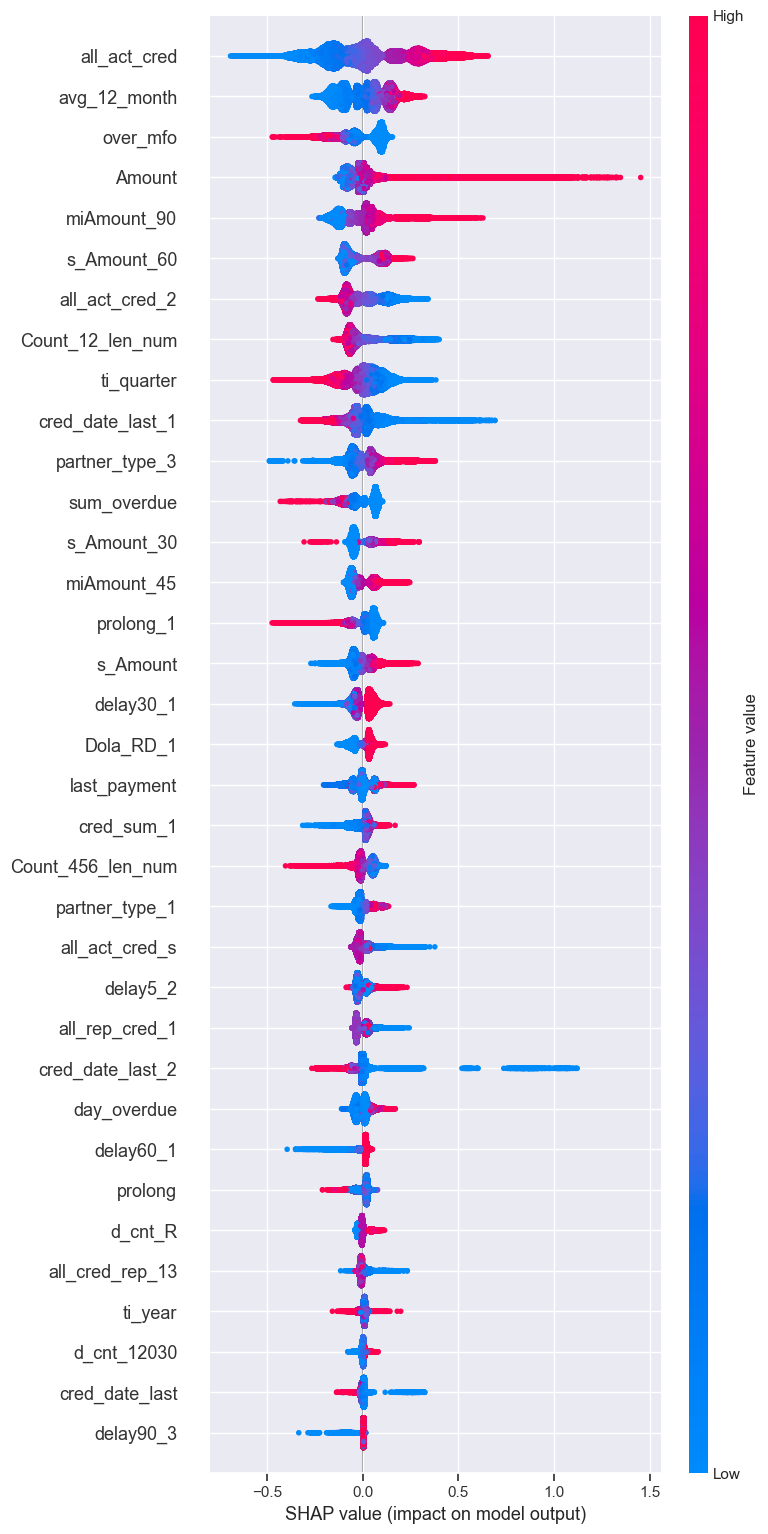

In [211]:
import shap

X = features.drop(['DraftId', 'Tdate'], axis = 1)
y = target

# Создание объяснителя без check_additivity

explainer = shap.TreeExplainer(model_35, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, max_display=X.shape[1])

In [242]:
features.shape

(144014, 37)

# Выгрузка результатов модели

In [212]:
probas = model_35.predict_proba(features.drop(['DraftId', 'Tdate'], axis = 1))[:,1]

In [213]:
model_answer = model_35.predict(features.drop(['DraftId', 'Tdate'], axis = 1))

In [214]:
data_train['type'] = 'train'

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\296895888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['type'] = 'train'


In [215]:
data_train['model_proba'] = probas
data_train['model_answer'] = model_answer

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2371176110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['model_proba'] = probas
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2371176110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['model_answer'] = model_answer


In [216]:
probas = model_35.predict_proba(data_test.drop(['DraftId', 'Tdate', 'is_paid'], axis = 1))[:,1]

In [217]:
model_answer = model_35.predict(data_test.drop(['DraftId', 'Tdate', 'is_paid'], axis = 1))

In [218]:
data_test['type'] = 'test'

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2650840620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['type'] = 'test'


In [219]:
data_test['model_proba'] = probas
data_test['model_answer'] = model_answer

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1542455064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['model_proba'] = probas
C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1542455064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['model_answer'] = model_answer


In [221]:
data_answer = pd.concat([data_train, data_test])

# model_proba в динамике

In [222]:
big_data_1 = data_answer[['Tdate', 'model_proba', 'is_paid']].resample('M', on = 'Tdate').mean()

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\3954555019.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  big_data_1 = data_answer[['Tdate', 'model_proba', 'is_paid']].resample('M', on = 'Tdate').mean()


In [223]:
big_data_1

,model_proba,is_paid
Tdate,,
2023-01-31,0.489510,0.485036
2023-02-28,0.490387,0.488147
2023-03-31,0.494533,0.503875
2023-04-30,0.486613,0.516388
2023-05-31,0.467544,0.464462
2023-06-30,0.477456,0.445185
2023-07-31,0.495937,0.465866
2023-08-31,0.513060,0.490933
2023-09-30,0.506597,0.495019


In [228]:
a = []
for i in list(big_data_1.index):
    a.append(data_answer.resample('M', on = 'Tdate')['DraftId'].count()[i])
a    

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\1259410256.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  a.append(data_answer.resample('M', on = 'Tdate')['DraftId'].count()[i])


[13065,
 12107,
 12128,
 11838,
 13760,
 12460,
 11484,
 10478,
 10741,
 10767,
 9438,
 8213,
 7535,
 7527,
 8996,
 2755]

In [229]:
big_data_1['zayavki'] = a

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

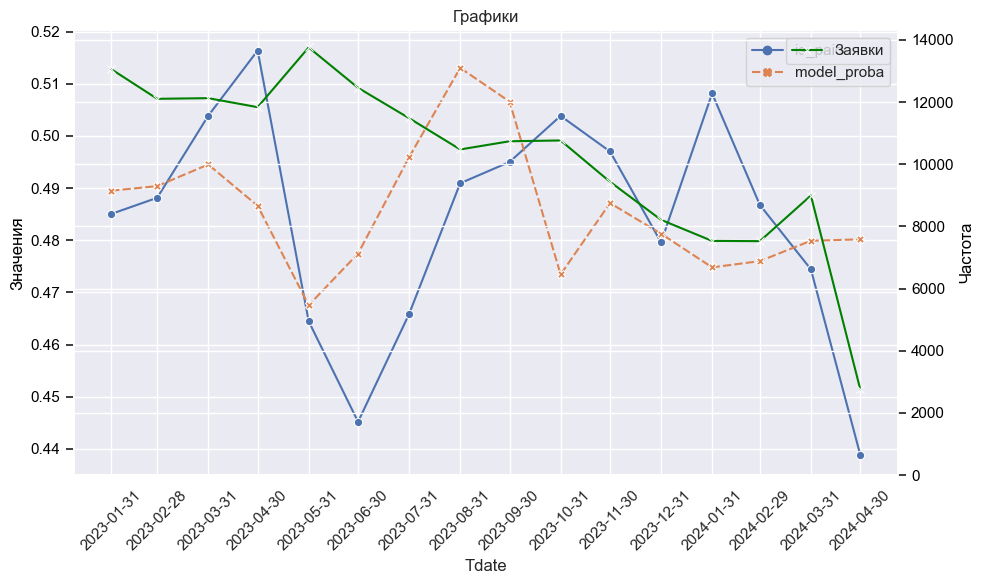

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
# big_data_1 должен быть определен заранее

# Создание фигуры и осей
fig, ax1 = plt.subplots(figsize=(10, 6))

# Построение графика для первых двух столбцов
sns.lineplot(data=big_data_1[['is_paid', 'model_proba']], ax=ax1, markers=True)
ax1.set_ylabel('Значения', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Установка меток на оси X
ax1.set_xticks(big_data_1.index)
ax1.set_xticklabels(big_data_1.index.strftime('%Y-%m-%d'), rotation=45)

# Создание второй оси для гистограммы
ax2 = ax1.twinx()  # Создание второй оси y

# Построение зеленой линии с крестиками
sns.lineplot(data=big_data_1['zayavki'], ax=ax2, color='green', markers='o', marker='x', label='Заявки')

# Установка границ для оси Y гистограммы
ax2.set_ylim(0, ax2.get_ylim()[1])  # Установка верхней границы оси Y для гистограммы
ax2.set_ylabel('Частота', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Заголовок графика
plt.title('Графики')

# Показ графика
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

# Стабильность признаков

In [231]:
d_gini = pd.DataFrame(index=data_train.drop(['DraftId', 'is_paid', 'type', 'model_proba', 'model_answer'], axis = 1).columns)

# Расчет коэффициента Джини для каждой переменной
for var in data_train.drop(['DraftId', 'is_paid', 'type', 'model_proba', 'model_answer'], axis = 1).columns:
    # Расчет Gini для обучающей выборки
    gini_train = round(1 - (2 * roc_auc_score(data_train['is_paid'], data_train[var].fillna(-99999))), 3)
    d_gini.loc[var, 'Gini_train'] = gini_train*100
    
    # Расчет Gini для тестовой выборки
    gini_test = round(1 - (2 * roc_auc_score(data_test['is_paid'], data_test[var].fillna(-99999))), 3)
    d_gini.loc[var, 'Gini_test'] = gini_test*100
    
    # Расчет Gini для OOT выборки
    

# Вывод результата

In [232]:
d_gini

,Gini_train,Gini_test
Count_12_len_num,19.2,20.0
s_Amount_60,-17.6,-17.6
over_mfo,18.0,16.2
all_act_cred_2,16.5,14.6
sum_overdue,16.8,15.1
Amount,-5.1,-17.7
Count_456_len_num,16.5,13.4
miAmount_45,-15.5,-15.1
day_overdue,13.6,11.8
s_Amount_30,-12.7,-12.5


In [234]:
dd_gini = d_gini.copy()
a = []
for number in range(0, len(d_gini)):  # b + 1, чтобы включить b
    a.append(number)
dd_gini['index'] = a
dd_gini.set_index('index', inplace = True)
dd_gini['take'] = 1
for i in range(len(d_gini)):    
    if ( ((dd_gini.loc[i,'Gini_train'] < 0) & (dd_gini.loc[i,'Gini_train'] > 0) ) | ( (dd_gini.loc[i,'Gini_train'] > 0) & (dd_gini.loc[i,'Gini_train'] < 0) )) | (abs(dd_gini.loc[i,'Gini_train']) < 3):
        dd_gini.loc[i,'take'] = 0
dd_gini
a = dd_gini['take'].tolist()
d_gini['mask'] = a
d_gini[d_gini['mask'] == 0]

,Gini_train,Gini_test,mask
Tdate,-0.4,2.9,0


In [235]:
d_gini[d_gini['mask'] == 0].index

Index(['Tdate'], dtype='object')

# ответы модели в excel

In [237]:
short_answer = data_answer[['DraftId', 'Tdate', 'type', 'model_proba', 'model_answer']]
#short_answer.rename(columns = {'DraftId': 'DraftId'}, inplace = True)

In [238]:
dd = data_answer[['DraftId', 'model_proba', 'is_paid', 'type']]
dd.reset_index(inplace = True, drop = True)
for i in range(len(dd)): 
    if (dd.loc[i, 'model_proba'] < 0.1) & (dd.loc[i, 'model_proba']  >= 0):
        dd.loc[i, 'model_proba'] = '[0;10)'
        continue
    if (dd.loc[i, 'model_proba'] < 0.2) & (dd.loc[i, 'model_proba']  >= 0.1):
        dd.loc[i, 'model_proba'] = '[10;20)'
        continue
    if (dd.loc[i, 'model_proba'] < 0.3) & (dd.loc[i, 'model_proba']  >= 0.2):
        dd.loc[i, 'model_proba'] = '[20;30)'    
        continue
    if (dd.loc[i, 'model_proba'] < 0.4) & (dd.loc[i, 'model_proba']  >= 0.3):
        dd.loc[i, 'model_proba'] = '[30;40)'
        continue
    if (dd.loc[i, 'model_proba'] < 0.5) & (dd.loc[i, 'model_proba']  >= 0.4):
        dd.loc[i, 'model_proba'] = '[40;50)'  
        continue
    if (dd.loc[i, 'model_proba'] < 0.6) & (dd.loc[i, 'model_proba']  >= 0.5):
        dd.loc[i, 'model_proba'] = '[50;60)' 
        continue
    if (dd.loc[i, 'model_proba'] < 0.7) & (dd.loc[i, 'model_proba']  >= 0.6):
        dd.loc[i, 'model_proba'] = '[60;70)'
        continue
    if (dd.loc[i, 'model_proba'] < 0.8) & (dd.loc[i, 'model_proba']  >= 0.7):
        dd.loc[i, 'model_proba'] = '[70;80)'
        continue
    if (dd.loc[i, 'model_proba'] < 0.9) & (dd.loc[i, 'model_proba']  >= 0.8):
        dd.loc[i, 'model_proba'] = '[80;90)'
        continue
    if (dd.loc[i, 'model_proba'] <= 1) & (dd.loc[i, 'model_proba']  >= 0.9):
        dd.loc[i, 'model_proba'] = '[90;100]'        
        continue

wc = pd.read_excel('Desktop\Модели и их датафреймы\Обуч до февраля новая\Working Capital (1).xlsx')
wc.drop(['Model_answer', 'Вероятность', 'Бакет', 'target', 'Type', 'is_paid'], axis = 1, inplace = True)
wc = wc.merge(dd, how = 'inner', on = 'DraftId')
wc = wc[wc['type'] == 'test']

C:\Users\grishin\AppData\Local\Temp\ipykernel_8104\2183569458.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[30;40)' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  dd.loc[i, 'model_proba'] = '[30;40)'


In [239]:
wc

,DraftId,dpd0,dpd15,dpd30,dpd60,dpd90,LoanAmount,model_proba,is_paid,type
32,95A899E9-7311-4E9C-8816-5E4DFECF03B0,0.0,2448.0,3888.0,3888.0,8640.0,9000,[50;60),0.0,test
65,B74C8759-D592-440A-ADEF-BEFD2469A29C,16408.8,16408.8,16408.8,16408.8,16408.8,15900,[70;80),1.0,test
70,4C9042BA-68EE-427A-B338-FDE04612D652,16449.6,16449.6,16449.6,16449.6,16449.6,14900,[50;60),1.0,test
75,0A148FBC-31C0-4A01-BACC-3AC1CDF7D289,0.0,0.0,0.0,0.0,0.0,12900,[50;60),0.0,test
83,074C9111-B241-412D-89DC-CB7B77F52256,0.0,0.0,0.0,0.0,0.0,14900,[30;40),0.0,test
...,...,...,...,...,...,...,...,...,...,...
163240,F9200331-3EEF-4721-A519-40AEF0FB0D6F,0.0,0.0,8610.0,8610.0,8610.0,30000,[20;30),0.0,test
163265,732ED158-2587-4C77-A150-D09CAB2541C7,15704.0,15704.0,15704.0,15704.0,15704.0,13000,[70;80),1.0,test
163277,7A292402-D5C5-4585-9C8B-9DFE10BCF6C6,1832.8,1832.8,1832.8,4037.8,4037.8,7900,[50;60),0.0,test
163279,A3B848D7-4549-4A92-9933-821DF0A60093,0.0,0.0,0.0,0.0,0.0,11000,[50;60),0.0,test


In [240]:
wc.to_csv('wc_14.11_droped_bad_features_new.csv', index = False)